## 타이타닉 데이터 실습

In [34]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

file_path ="/Users/yunseongmun/Documents/Ai_Lecture/data/titanic.csv"

df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 결측치 제거
1. 결측치가 적으면 그냥 제거
2. 결측치가 많으면 평균을 내고 입력

In [36]:
# 'embarked' 열의 고유 값과 그 개수 확인
embarked_counts = df['Embarked'].value_counts()

# 결과 출력 (class가 골고루 분포돼있는게 좋은 데이터)
print(embarked_counts)

# 결측치 확인
df.isnull().sum()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# 'Age' 컬럼의 결측치를 그 컬럼의 평균 값으로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 'Cabin' 이 칼럼은 숫자 타입이 아니라 에러가 뜸
# df['Cabin'].fillna(df['Cabin'].mean(), inplace=True)

In [38]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [39]:
# 'embarked' 열의 고유 값과 그 개수 확인
embarked_counts = df['Embarked'].value_counts()

# 결과 출력 (class가 골고루 분포돼있는게 좋은 데이터)
print(embarked_counts)

Embarked
S    129
C     69
Q      4
Name: count, dtype: int64


In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
df=df.drop(['Name', 'Fare'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,C85,C
3,4,1,1,female,35.0,1,0,113803,C123,S
6,7,0,1,male,54.0,0,0,17463,E46,S
10,11,1,3,female,4.0,1,1,PP 9549,G6,S
11,12,1,1,female,58.0,0,0,113783,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,D35,S
872,873,0,1,male,33.0,0,0,695,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,11767,C50,C
887,888,1,1,female,19.0,0,0,112053,B42,S


### 산점도

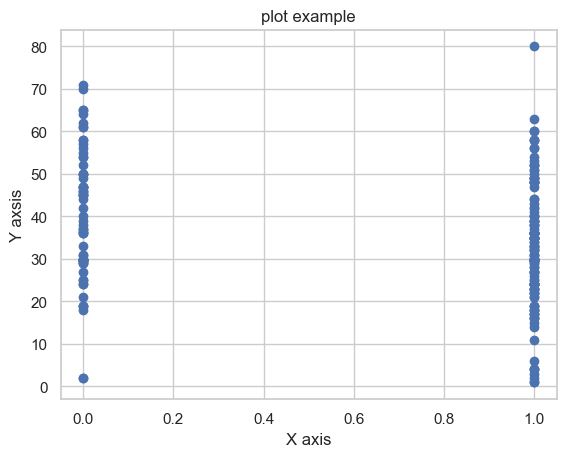

In [44]:
import matplotlib.pyplot as plt

plt.scatter(df['Survived'],df['Age'])
plt.xlabel('X axis')
plt.ylabel('Y axsis')
plt.title('plot example')
plt.grid(True)
plt.show()

### Box Flot

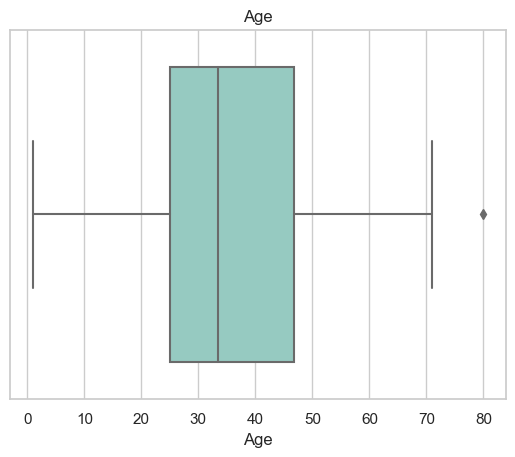

In [47]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age")
plt.show()